#Hypothesis

use bins. 1-2 hours or 2-3 hours for familiar destinations and for new adventures

Corrolation between age and time spent packs

# Import Packages

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as seaborn
print ("Imported all libraries successfully...")

Imported all libraries successfully...


# Read Our Survey Data

In [5]:
import requests
file_path = 'Packing-Research.xlsx'
data = pd.read_excel(file_path)

# Display the Date frame
data



,timestamp,age,gender,packing_habbit,travel_frequency,airport_spending,reason,desination,packing_hours,travel_company,transportation_mode,luggage,Which of the following do you regularly consider when packing for travel?,airport_spending.1,previous_desination,"What strategies/tools do you use to help you pack? Do you have any unique ""packing hacks""?",What is the most difficult part of preparing for travel?
0,2022-11-03 18:46:34.066,25-35,Female,Neither,10,$50 - $99.99,Visiting family,New adventures,4.0,With others (family),Airplane,A suitcase,"Activities while there, Duration of trip, Weat...",Sometimes,"Sarasota, FL",NaN,NaN
1,2022-11-03 18:52:12.453,25-35,Female,Overpack,10,$20 - $49.99,Professional/business trip,Familiar destination,1.5,Alone,Car,Multiple suitcases,"Activities while there, Duration of trip, Weat...",Occasionally,"Branson, MO",I have a basic packing list saved on my phone ...,Packing!
2,2022-11-03 18:55:25.848,50+,Female,Overpack,2023-02-05 00:00:00,$0 - $19.99,Visiting family,Familiar destination,1.0,With others (family),Car,A suitcase,"Activities while there, Duration of trip, Weat...",Occasionally,Plano TX,NaN,NaN
3,2022-11-03 19:19:53.629,35-50,Female,Overpack,2023-05-10 00:00:00,$20 - $49.99,Visiting family,New adventures,1.0,With others (family),Car,Multiple suitcases,"Activities while there, Duration of trip, Weat...",Occasionally,Memphis,Roll clothes to fit more,Packing everyone’s (4 people) suitcases
4,2022-11-03 19:26:11.082,50+,Male,Overpack,2023-02-05 00:00:00,$0 - $19.99,Visiting family,Familiar destination,1.5,With others (family),Airplane,Multiple suitcases,"Activities while there, Duration of trip, Weat...",Never,Any of the grandkids homes,Nope,Waiting for the wife
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2022-11-08 15:42:02.908,35-50,Female,Underpack,2023-02-05 00:00:00,$20 - $49.99,Visiting family,Familiar destination,1.0,Alone,Airplane,"A backpack, A duffel bag",Comfort while travelling,Sometimes,"Baltimore, MD","Pack only what I would wear any day, no specia...",Not having a set list of items needed
57,2022-11-08 23:10:56.890,50+,Female,Underpack,2023-01-02 00:00:00,$20 - $49.99,Visiting family,Familiar destination,1.0,With others (family),Car,A suitcase,"Activities while there, Duration of trip, Weat...",Occasionally,Indiana,No,Planning
58,2022-11-10 12:31:08.928,18-25,Male,Overpack,10,$20 - $49.99,Visiting family,Familiar destination,5.0,With others (family),Airplane,"A backpack, A suitcase","Activities while there, Duration of trip, Weat...",Occasionally,Los Angeles,I made an AI system to do some predictive mode...,Getting my family to pack correctly
59,2022-11-10 21:55:16.705,Under 18,Female,Neither,2023-02-05 00:00:00,$20 - $49.99,Visiting family,Familiar destination,1.5,Alone,Airplane,"A backpack, A suitcase","Activities while there, Duration of trip, Weat...",Never,Here,Just everything I might need. Buy toiletries h...,Idk


# Clean Age

In [6]:
# Clean our age data so instead of a range we have actual numbers.
def cleanAge(age):

  # Check for under 18
  if(age == "Under 18"):
    return np.random.randint(10,19)

  # Check for range.
  elif("+" in str(age)):
    randLow   = int(age.replace("+", ""))
    randUpper = 90

  # Change the values.
  elif "-" in str(age):
    randLow, randUpper = map(int, age.split("-"))

  # Return our random values in the data set.
  return np.random.randint(randLow,randUpper)

#
data['age'] = data['age'].apply(cleanAge)

# Check to see if the operation worked.
data.head()

,timestamp,age,gender,packing_habbit,travel_frequency,airport_spending,reason,desination,packing_hours,travel_company,transportation_mode,luggage,Which of the following do you regularly consider when packing for travel?,airport_spending.1,previous_desination,"What strategies/tools do you use to help you pack? Do you have any unique ""packing hacks""?",What is the most difficult part of preparing for travel?
0,2022-11-03 18:46:34.066,32,Female,Neither,10,$50 - $99.99,Visiting family,New adventures,4.0,With others (family),Airplane,A suitcase,"Activities while there, Duration of trip, Weat...",Sometimes,"Sarasota, FL",NaN,NaN
1,2022-11-03 18:52:12.453,33,Female,Overpack,10,$20 - $49.99,Professional/business trip,Familiar destination,1.5,Alone,Car,Multiple suitcases,"Activities while there, Duration of trip, Weat...",Occasionally,"Branson, MO",I have a basic packing list saved on my phone ...,Packing!
2,2022-11-03 18:55:25.848,61,Female,Overpack,2023-02-05 00:00:00,$0 - $19.99,Visiting family,Familiar destination,1.0,With others (family),Car,A suitcase,"Activities while there, Duration of trip, Weat...",Occasionally,Plano TX,NaN,NaN
3,2022-11-03 19:19:53.629,42,Female,Overpack,2023-05-10 00:00:00,$20 - $49.99,Visiting family,New adventures,1.0,With others (family),Car,Multiple suitcases,"Activities while there, Duration of trip, Weat...",Occasionally,Memphis,Roll clothes to fit more,Packing everyone’s (4 people) suitcases
4,2022-11-03 19:26:11.082,86,Male,Overpack,2023-02-05 00:00:00,$0 - $19.99,Visiting family,Familiar destination,1.5,With others (family),Airplane,Multiple suitcases,"Activities while there, Duration of trip, Weat...",Never,Any of the grandkids homes,Nope,Waiting for the wife


# Clean travel_frequency

In [7]:
def travelFreq(freq):
  try:
    # Check if the value is a range
    if "-" in str(freq):
        lower, upper = map(int, str(freq).split("-"))
        return np.random.randint(lower, upper + 1)
    else:
        # If not a range, return the value as is
        return int(freq)
  except:
    # If there's any error (e.g., unexpected format), return a random value between 1 and 12
    return np.random.randint(1, 13)

data['travel_frequency'] = data['travel_frequency'].apply(travelFreq)

# Display cleaned travel_frequency data
data.head()

,timestamp,age,gender,packing_habbit,travel_frequency,airport_spending,reason,desination,packing_hours,travel_company,transportation_mode,luggage,Which of the following do you regularly consider when packing for travel?,airport_spending.1,previous_desination,"What strategies/tools do you use to help you pack? Do you have any unique ""packing hacks""?",What is the most difficult part of preparing for travel?
0,2022-11-03 18:46:34.066,32,Female,Neither,10,$50 - $99.99,Visiting family,New adventures,4.0,With others (family),Airplane,A suitcase,"Activities while there, Duration of trip, Weat...",Sometimes,"Sarasota, FL",NaN,NaN
1,2022-11-03 18:52:12.453,33,Female,Overpack,10,$20 - $49.99,Professional/business trip,Familiar destination,1.5,Alone,Car,Multiple suitcases,"Activities while there, Duration of trip, Weat...",Occasionally,"Branson, MO",I have a basic packing list saved on my phone ...,Packing!
2,2022-11-03 18:55:25.848,61,Female,Overpack,11,$0 - $19.99,Visiting family,Familiar destination,1.0,With others (family),Car,A suitcase,"Activities while there, Duration of trip, Weat...",Occasionally,Plano TX,NaN,NaN
3,2022-11-03 19:19:53.629,42,Female,Overpack,8,$20 - $49.99,Visiting family,New adventures,1.0,With others (family),Car,Multiple suitcases,"Activities while there, Duration of trip, Weat...",Occasionally,Memphis,Roll clothes to fit more,Packing everyone’s (4 people) suitcases
4,2022-11-03 19:26:11.082,86,Male,Overpack,4,$0 - $19.99,Visiting family,Familiar destination,1.5,With others (family),Airplane,Multiple suitcases,"Activities while there, Duration of trip, Weat...",Never,Any of the grandkids homes,Nope,Waiting for the wife


# Clean Spending

In [8]:
def clean_spending(spending_val):
    try:
        # Check if the value is a range with "-"
        if "-" in str(spending_val):
            lower, upper = map(float, str(spending_val).replace("$", "").split(" - "))
            value = np.random.uniform(lower, upper)

        # Check if the value contains "+"
        elif "+" in str(spending_val):
            lower = float(spending_val.replace("$", "").replace("+", ""))
            upper = lower + 100
            value = np.random.uniform(lower, upper)

        else:
            # If not a range, return the value as is
            value = float(spending_val.replace("$", ""))

        # Round to the nearest 99 cents
        rounded_value = int(value) + 0.99
        return rounded_value

    except:
        return spending_val

data['airport_spending'] = data['airport_spending'].apply(clean_spending)

# Display cleaned airport_spending.1 data
data.head()

data = data.iloc[:, :-5]

data.head()


,timestamp,age,gender,packing_habbit,travel_frequency,airport_spending,reason,desination,packing_hours,travel_company,transportation_mode,luggage
0,2022-11-03 18:46:34.066,32,Female,Neither,10,99.99,Visiting family,New adventures,4.0,With others (family),Airplane,A suitcase
1,2022-11-03 18:52:12.453,33,Female,Overpack,10,42.99,Professional/business trip,Familiar destination,1.5,Alone,Car,Multiple suitcases
2,2022-11-03 18:55:25.848,61,Female,Overpack,11,8.99,Visiting family,Familiar destination,1.0,With others (family),Car,A suitcase
3,2022-11-03 19:19:53.629,42,Female,Overpack,8,39.99,Visiting family,New adventures,1.0,With others (family),Car,Multiple suitcases
4,2022-11-03 19:26:11.082,86,Male,Overpack,4,9.99,Visiting family,Familiar destination,1.5,With others (family),Airplane,Multiple suitcases


#Output

Text(0, 0.5, 'Count')

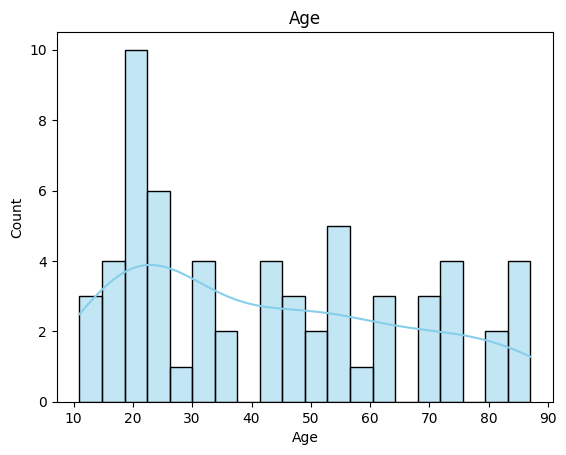

In [9]:
# Age Distribution.
seaborn.histplot(data['age'], bins = 20, kde=True, color='skyblue')
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

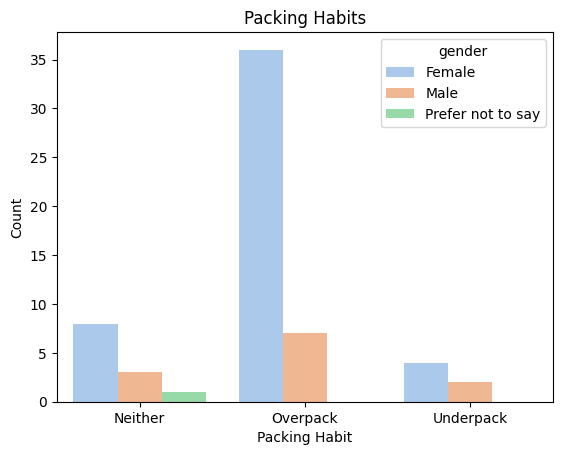

In [10]:
# Packing Habits by Gender
seaborn.countplot(data=data, x = 'packing_habbit', hue='gender', palette='pastel')
plt.title('Packing Habits')
plt.xlabel('Packing Habit')
plt.ylabel('Count')


Text(0, 0.5, 'Reason')

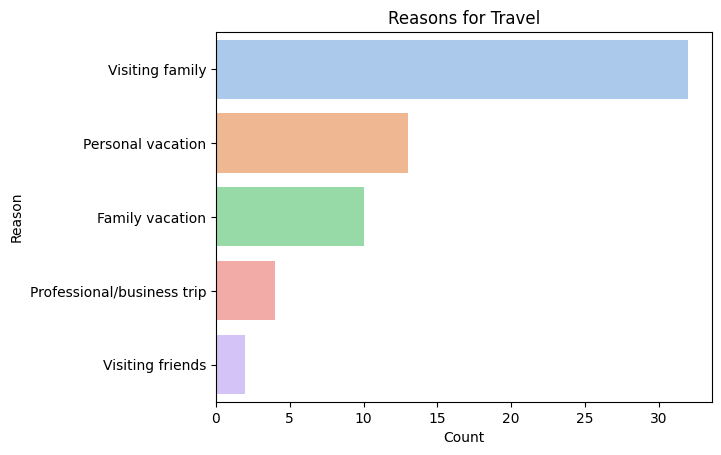

In [11]:
# Reason for Travel
seaborn.countplot(y=data['reason'], palette='pastel', order=data['reason'].value_counts().index)
plt.title('Reasons for Travel')
plt.xlabel('Count')
plt.ylabel('Reason')


# GitHub

# Goals
- First
- Second
- Thrid


# Data Set

- __age__: Age of the survey participant.
- ...


# Potential Issues



#License

MIT License

Copyright (c) [year] [fullname]

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.